In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras import regularizers
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Fall 2020/Knowledge Discovery/Project/creditcard.csv")

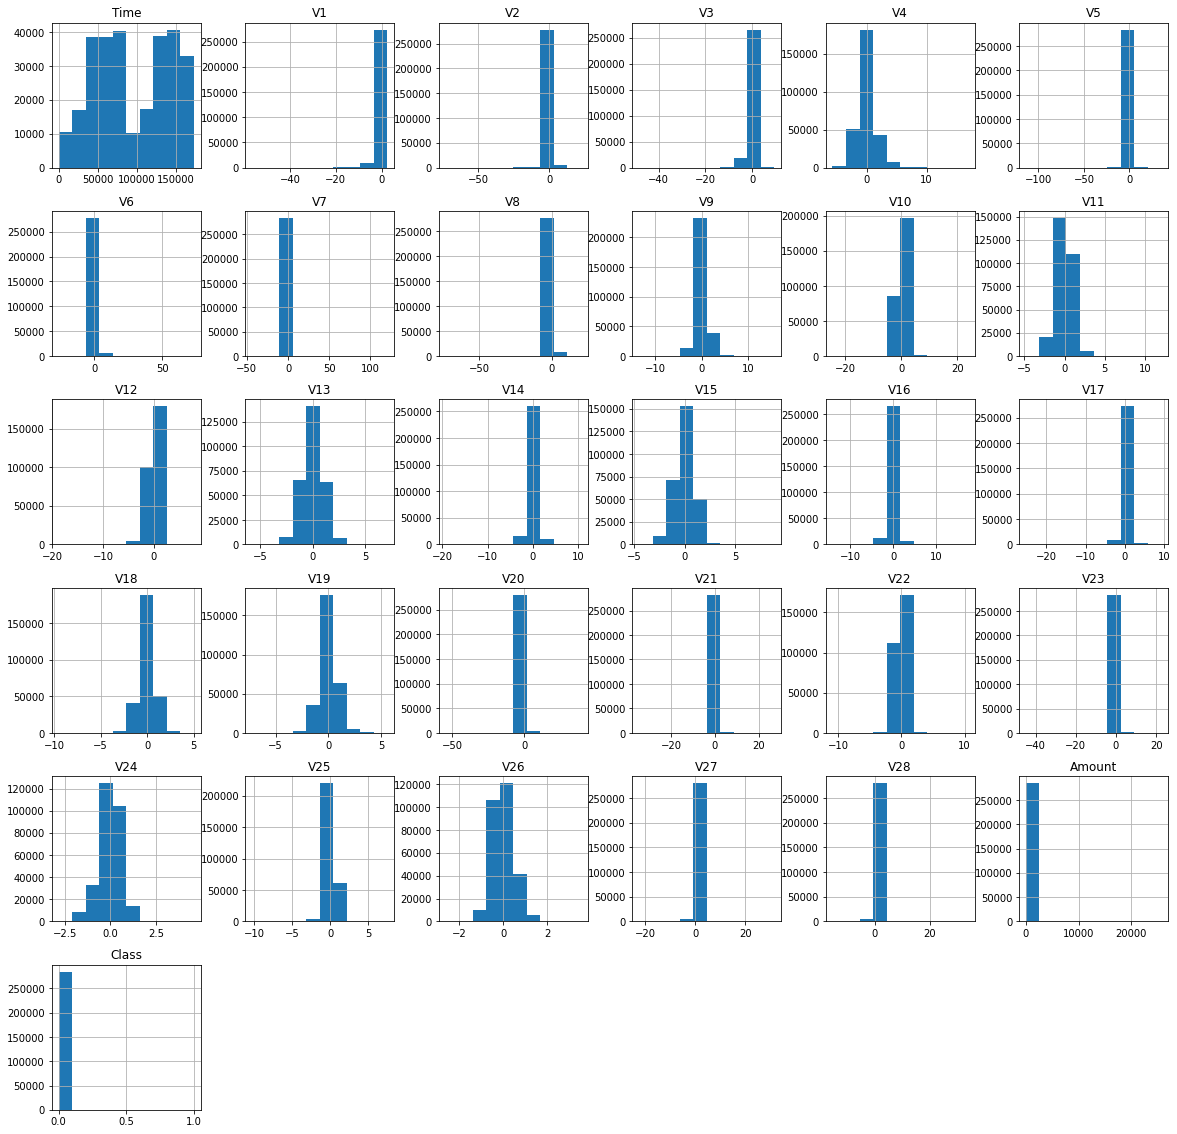

In [5]:
df.hist(figsize=(20,20))
plt.show()

In [6]:
correlation=df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


In [7]:
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [8]:
X_data_under = df.drop("Class", axis=1)
y_data_under = df["Class"]


In [9]:

# transform the dataset
ranUnSample = RandomUnderSampler()
X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_data_under,y_data_under)
X_train, X_test, y_train, y_test = train_test_split(X_ranUnSample, y_ranUnSample, test_size=0.25, random_state=27)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
c0=0
c1=0
for i in y_train:
  if i==0:
    c0=c0+1
  else:
    c1=c1+1
print("No frauds",c0,"No. of frauds",c1)

No frauds 364 No. of frauds 374


# SVM

In [11]:
model_SVM= SVC(C=5.0,kernel='rbf')
model_SVM.fit(X_ranUnSample,y_ranUnSample)
y_pred = model_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.959%


In [12]:
# confusion_matrix
print(confusion_matrix(y_test,y_pred))
# classification_report
print(classification_report(y_test, y_pred))

[[127   1]
 [  9 109]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.99      0.92      0.96       118

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



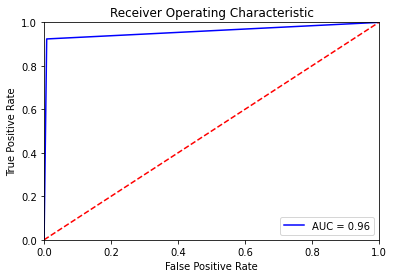

In [13]:
import sklearn.metrics as metrics
fpr_s, tpr_s, thresholds_s = metrics.roc_curve(y_test, y_pred)
roc_auc_svm = metrics.auc(fpr_s, tpr_s)
plt.title('Receiver Operating Characteristic')
svm=plt.plot(fpr_s, tpr_s, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#KNN

In [14]:

model_LR = KNeighborsClassifier(n_neighbors=8)
model_LR.fit(X_ranUnSample,y_ranUnSample)
y_pred = model_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))
# confusion_matrix
print(confusion_matrix(y_test,y_pred))
# classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.959%
[[127   1]
 [  9 109]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.99      0.92      0.96       118

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



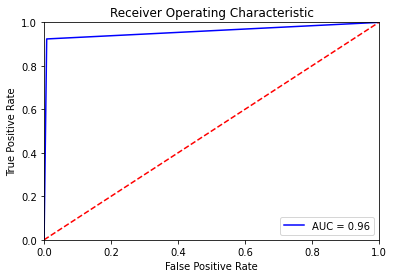

In [15]:
import sklearn.metrics as metrics
fpr_lrr, tpr_lrr, thresholds_lrr = metrics.roc_curve(y_test, y_pred)
roc_auc_lrr = metrics.auc(fpr_lrr, tpr_lrr)
plt.title('Receiver Operating Characteristic')
lrr=plt.plot(fpr_lrr, tpr_lrr, 'b', label = 'AUC = %0.2f' % roc_auc_lrr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Random Forest

In [16]:
model_rdc=RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=10,
                             max_features=8,
                             min_samples_leaf=1,
                             bootstrap=True)
model_rdc.fit(X_ranUnSample,y_ranUnSample)
pred=model_rdc.predict(X_test)
print(classification_report(pred,y_test))
print('\n')
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       0.97      1.00      0.99       115

    accuracy                           0.99       246
   macro avg       0.99      0.99      0.99       246
weighted avg       0.99      0.99      0.99       246



[[128   3]
 [  0 115]]


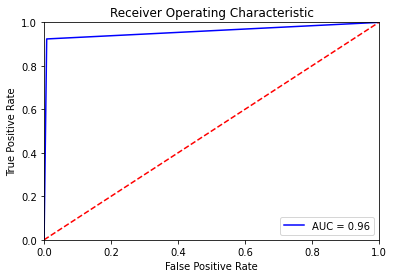

In [17]:
import sklearn.metrics as metrics
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Bernoulli Naive Bayes

In [18]:

Model = BernoulliNB()
Model.fit(X_ranUnSample, y_ranUnSample)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       128
           1       1.00      0.86      0.92       118

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

[[128   0]
 [ 17 101]]
accuracy is 0.9308943089430894


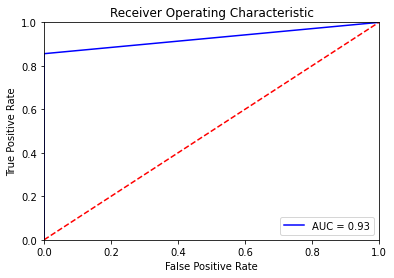

In [19]:
import sklearn.metrics as metrics
fpr_bn, tpr_bn, thresholds_bn = metrics.roc_curve(y_test, y_pred)
roc_auc_bn = metrics.auc(fpr_bn, tpr_bn)
plt.title('Receiver Operating Characteristic')
bn=plt.plot(fpr_bn, tpr_bn, 'b', label = 'AUC = %0.2f' % roc_auc_bn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Linear Discriminant Analysis

In [20]:

Model = LinearDiscriminantAnalysis()
Model.fit(X_ranUnSample,y_ranUnSample)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       128
           1       1.00      0.87      0.93       118

    accuracy                           0.94       246
   macro avg       0.95      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246

[[128   0]
 [ 15 103]]
accuracy is 0.9390243902439024


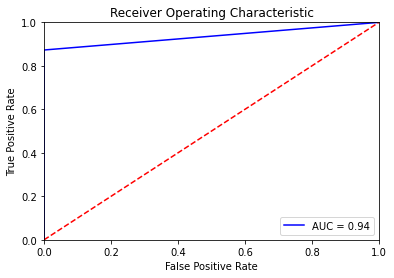

In [21]:
import sklearn.metrics as metrics
fpr_lda, tpr_lda, thresholds_lda = metrics.roc_curve(y_test, y_pred)
roc_auc_lda = metrics.auc(fpr_lda, tpr_lda)
plt.title('Receiver Operating Characteristic')
lda=plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_lda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# MLP

In [22]:

Model=MLPClassifier(hidden_layer_sizes=8)
Model.fit(X_ranUnSample,y_ranUnSample)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.99      0.92      0.96       118

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

[[127   1]
 [  9 109]]
accuracy is  0.959349593495935


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


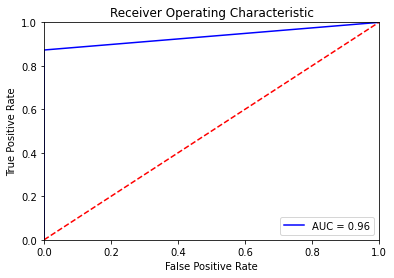

In [23]:
import sklearn.metrics as metrics
fpr_mlp, tpr_mlp, thresholds_mlp = metrics.roc_curve(y_test, y_pred)
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)
plt.title('Receiver Operating Characteristic')
mlp=plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_mlp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Gradient Boosting

In [24]:
## Gradient Boosting Machine
Model = GradientBoostingClassifier(n_estimators=100, random_state=9)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.97      0.93      0.95       118

    accuracy                           0.96       246
   macro avg       0.96      0.95      0.96       246
weighted avg       0.96      0.96      0.96       246

[[125   3]
 [  8 110]]
accuracy is 0.9552845528455285


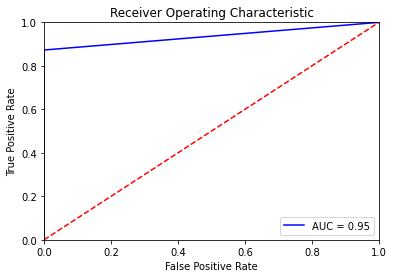

In [25]:
import sklearn.metrics as metrics
fpr_boost, tpr_boost, thresholds_boost = metrics.roc_curve(y_test, y_pred)
roc_auc_boost = metrics.auc(fpr_boost, tpr_boost)
plt.title('Receiver Operating Characteristic')
boost=plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_boost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Autoencoder

In [26]:
from keras.models import Model

In [27]:
input_size = X_train.shape[1]
encoding_size = 14

In [28]:
input_layer = Input(shape=(input_size, ))

encoder_1 = Dense(encoding_size, activation="relu", activity_regularizer=regularizers.l1(1e-8))(input_layer)
encoder_2 = Dense(int(encoding_size / 2), activation="relu")(encoder_1)
decoder_1 = Dense(encoding_size, activation='relu')(encoder_2)
output_layer = Dense(input_size, activation='relu')(decoder_1)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [29]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='./logs', write_images=True)

history = autoencoder.fit(X_train, X_train, epochs=80, batch_size=8, shuffle=True, validation_data=(X_test, X_test),
                  callbacks=[tensorboard]).history

Epoch 1/80
 1/93 [..............................] - ETA: 0s - loss: 17.8059 - accuracy: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
93/93 [==============================] - 0s 4ms/step - loss: 14.5325 - accuracy: 0.0393 - val_loss: 13.8692 - val_accuracy: 0.1260
Epoch 2/80
93/93 [==============================] - 0s 2ms/step - loss: 13.7536 - accuracy: 0.1423 - val_loss: 13.5662 - val_accuracy: 0.1463
Epoch 3/80
93/93 [==============================] - 0s 2ms/step - loss: 13.5464 - accuracy: 0.1450 - val_loss: 13.2339 - val_accuracy: 0.1626
Epoch 4/80
93/93 [==============================] - 0s 2ms/step - loss: 13.2385 - accuracy: 0.1463 - val_loss: 13.0923 - val_accuracy: 0.1545
Epoch 5/80
93/93 [==============================] - 0s 2ms/step - l

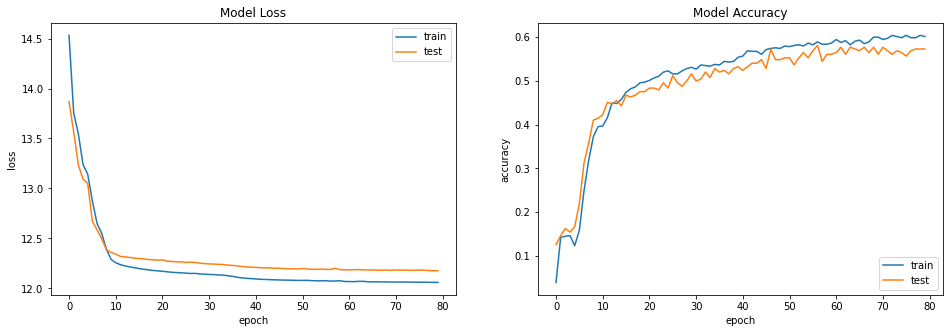

In [30]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.subplot(1,2,2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.show()

In [31]:
prediction = autoencoder.predict(X_test)

In [32]:
import numpy as np

mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})

In [33]:
from sklearn.metrics import confusion_matrix
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]
print('Confusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))

Confusion Matrix
[[125   3]
 [ 21  97]]


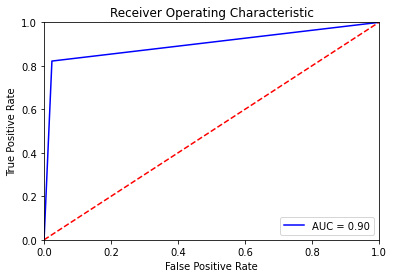

In [34]:
import sklearn.metrics as metrics
fpr_auto, tpr_auto, thresholds_auto = metrics.roc_curve(y_test, y_pred)
roc_auc_auto= metrics.auc(fpr_auto, tpr_auto)
plt.title('Receiver Operating Characteristic')
auto=plt.plot(fpr_auto, tpr_auto, 'b', label = 'AUC = %0.2f' % roc_auc_auto)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# CNN

In [35]:
X_smote=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [36]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_smote[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0009),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_smote,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
24/24 [==============================] - 0s 16ms/step - loss: 0.3548 - accuracy: 0.8672 - val_loss: 0.4132 - val_accuracy: 0.7602
Epoch 2/10
24/24 [==============================] - 0s 8ms/step - loss: 0.2074 - accuracy: 0.9241 - val_loss: 0.2944 - val_accuracy: 0.9512
Epoch 3/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1865 - accuracy: 0.9268 - val_loss: 0.2468 - val_accuracy: 0.9553
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1581 - accuracy: 0.9363 - val_loss: 0.2053 - val_accuracy: 0.9553
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1656 - accuracy: 0.9350 - val_loss: 0.1930 - val_accuracy: 0.9512
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 0.1569 - accuracy: 0.9363 - val_loss: 0.1696 - val_accuracy: 0.9512
Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1530 - accuracy: 0.9363 - val_loss: 0.1639 - val_accuracy: 0.9512
Epoch 8/10
24/24 [=

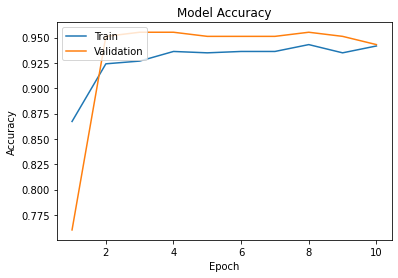

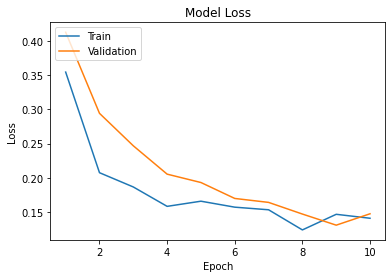

In [38]:
  epochs=10
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

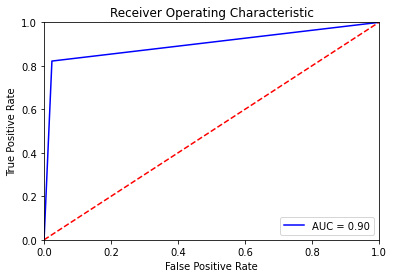

In [39]:
import sklearn.metrics as metrics
fpr_cnn, tpr_cnn, thresholds_cnn = metrics.roc_curve(y_test, y_pred)
roc_auc_cnn= metrics.auc(fpr_cnn, tpr_cnn)
plt.title('Receiver Operating Characteristic')
cnn=plt.plot(fpr_cnn, tpr_cnn, 'b', label = 'AUC = %0.2f' % roc_auc_cnn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# XGboost with GridSearch

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_ranUnSample, y_ranUnSample, test_size=0.25, random_state=27)

In [41]:
params={
 "learning_rate"    : [0.05,0.1, 0.3] ,
 "max_depth"        : [ 12, 15]
    
}

classifier = XGBClassifier()
grid_search= GridSearchCV(estimator = classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5)

In [42]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [43]:
start_time = timer(None) 
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 6.13 seconds.


In [44]:
grid_search.best_estimator_
accuracy = grid_search.best_score_
accuracy

0.9297932160348268

In [45]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
grid=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[125   3]
 [  9 109]]
Accuracy on X_test set  0.9512195121951219


In [48]:
print('Classification report on X_test set\n',classification_report(y_test,y_pred))

Classification report on X_test set
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.97      0.92      0.95       118

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



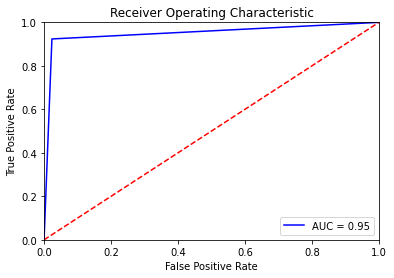

In [49]:
import sklearn.metrics as metrics
fpr_xgrid, tpr_xgrid, thresholds_xgrid = metrics.roc_curve(y_test, y_pred)
roc_auc_xgrid= metrics.auc(fpr_xgrid, tpr_xgrid)
plt.title('Receiver Operating Characteristic')
xgrid=plt.plot(fpr_xgrid, tpr_xgrid, 'b', label = 'AUC = %0.2f' % roc_auc_xgrid)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
